In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
data = pd.read_csv("Housing.csv")
print(" Dataset Loaded Successfully!")
print(data.info())
print("\n First 5 Records:")
print(data.head())

 Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

 First 5 Records:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420    

In [11]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("\n Numeric Columns:", list(numeric_cols))


 Numeric Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


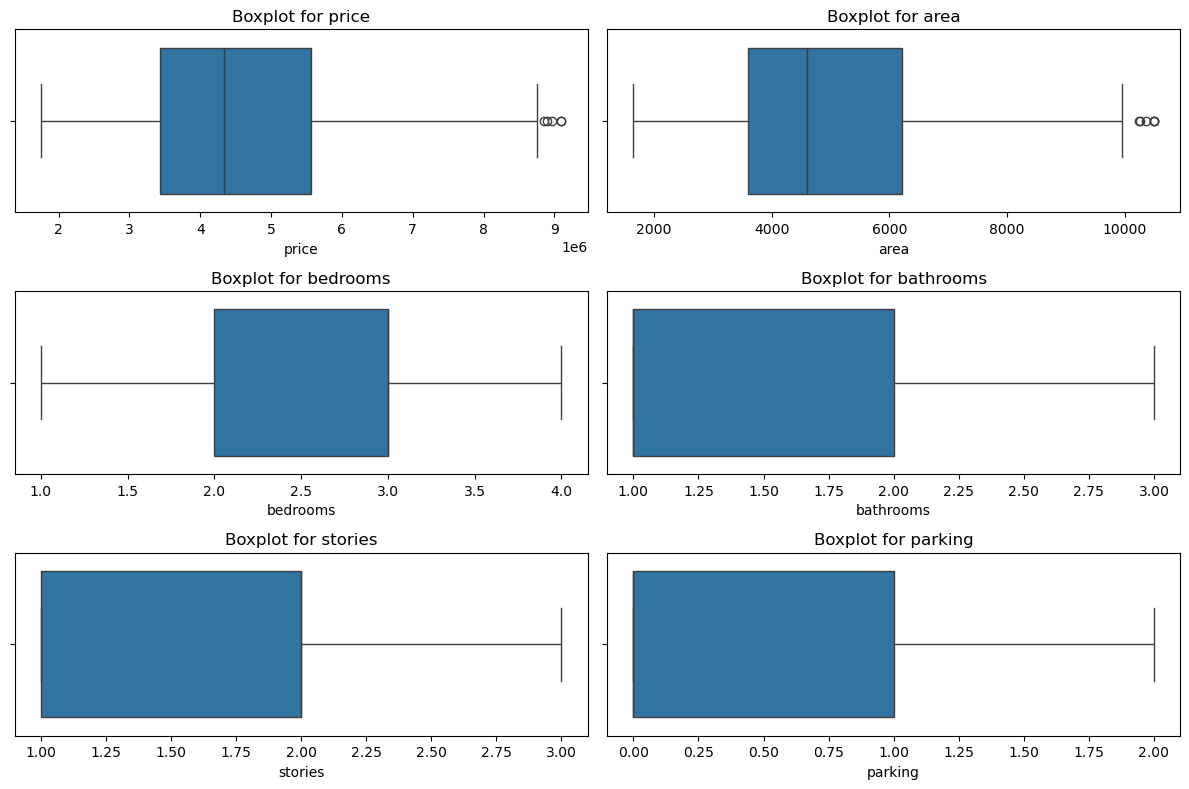

In [12]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

In [13]:
for col in numeric_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"\n {col}: Found {len(outliers)} outliers")

    # Replace outliers with median value
    median_value = data[col].median()
    data[col] = data[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

print("\n Outliers handled using IQR method.")


 price: Found 5 outliers

 area: Found 6 outliers

 bedrooms: Found 0 outliers

 bathrooms: Found 0 outliers

 stories: Found 0 outliers

 parking: Found 0 outliers

 Outliers handled using IQR method.


In [14]:
for col in numeric_cols:
    z_scores = stats.zscore(data[col])
    outliers_z = data[abs(z_scores) > 3]
    print(f"{col}: {len(outliers_z)} extreme outliers detected by Z-score")

price: 0 extreme outliers detected by Z-score
area: 0 extreme outliers detected by Z-score
bedrooms: 0 extreme outliers detected by Z-score
bathrooms: 10 extreme outliers detected by Z-score
stories: 0 extreme outliers detected by Z-score
parking: 0 extreme outliers detected by Z-score


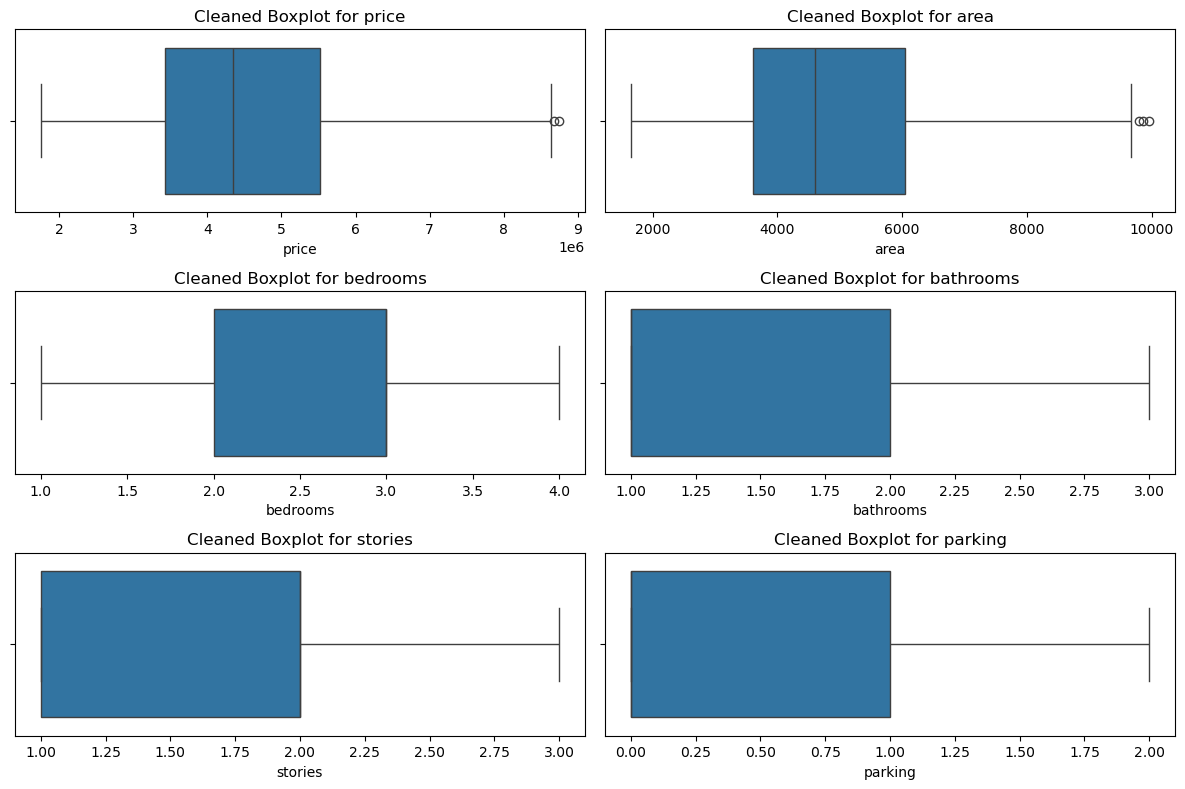

In [15]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f"Cleaned Boxplot for {col}")
plt.tight_layout()
plt.show()

In [16]:
print("\n Cleaned Dataset Summary:")
print(data.describe())


 Cleaned Dataset Summary:
              price         area    bedrooms   bathrooms     stories  \
count  5.450000e+02   545.000000  545.000000  545.000000  545.000000   
mean   4.550911e+06  4908.544954    2.917431    1.280734    1.655046   
std    1.516877e+06  1744.196576    0.657653    0.488936    0.608078   
min    1.750000e+06  1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06  3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06  4600.000000    3.000000    1.000000    2.000000   
75%    5.523000e+06  6050.000000    3.000000    2.000000    2.000000   
max    8.750000e+06  9960.000000    4.000000    3.000000    3.000000   

          parking  
count  545.000000  
mean     0.627523  
std      0.794498  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      2.000000  
